# PROCESO DE VACUNACION EN EL ECUADOR

<h2>Posteriormente se debe seguir un procesos de vacunación en los recintos electorales que se describe a continuación (Tomar el proceso para el proyecto final): </h2>

1*-Solo se va a tener en cuanta uno de los recintos electorales (investigar datos de cuantas personas asisten a votar).
Tomar los resultados de la regresión para la vacuna según la llegada.

Asisten a un recinto electoral un total de 350.


2*-Se tiene una promedio que el 80% de personas realizaran el proceso de vacunación dentro del Ecuador.

Un total de 280 se vacunan


3*-Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse.

No podran Vacunarse 17 a 35 personas

4*-Las personas solo tiene un recinto electoral para realizar el proceso.
   
Recinto Electoral Borja

5*-Las personas realizan la primera vacuna y 30 días después la segunda vacuna.

Regreso En 30 dias

6*-La persona se acerca a la mesa  y hacen fila en caso de ser necesario para recibir la vacuna.

Generar Fila

7*-Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.

Tiempo aleatorio entre 5 a 10 minutos

8*-Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud.

Espera obligatoria de 20 minutos en el interior

9*-La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.

Espera obligatoria 2 – 3 minutos para certificado de vacunación y la fecha 

10*-La persona sale del recinto electoral.

11*-Regresan para la próxima fecha y se repite el ciclo.




<h2>El proceso de simulación desarrollado deberá considerar los siguientes aspectos:</h2>

Se debe establecer un modelo basado en modelos matemáticos para la predicción del numero de veces que se compartirá o la tendencia del presidente basada en redes sociales.

El programa deberá generar gráficas que indiquen la ecuación matemática de las tendencias .

Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :

1*-Total de de personas que realizaron el proceso de vacunación.

2*-Grafico del porcentaje de personas que no recibieron la vacuna.

3*-El tiempo promedio de espera.



Datos Reales de un dia de vacunacion en el recinto del Coledio Tecnico Salesiano 
Lunes 450-600profesores vacunandos en un tiempo de 8 horas 

In [15]:
import simpy
import random

In [16]:
# Cantidad de mesas-casetas de vacunacion dentro del recinto.
CANTIDAD_MESA = 20


# Espera Obligatoria.
ESPERA_OBLIGATORIA = 20

# Tiempo de la simulacion 8H = 480 M
TIEMPO_LABORAL = 480

# Tiempo vacunacion 
TIEMPO_VACUNACION = 0


# Tiempo Vacunación
PERSONA_TIEMPO_VACUNACION = 0

# Tiempo Espera
TIEMPOESPERA = 0

PERSONAS=0

 # Dicciccionario con los tiempo de vacunación por persona
DICCIONARIO_PERSONA_TIEMPO_VACUNACION = {}

# Diccionario con los tiempos de espera por persona.
DICCIONARIO_TIEMPO_DE_ESPERA = {}

# Diccionario con los Personas No vacunadas.
DICCIONARIO_PERSONAS_NO_VACUNADAS = {}

In [17]:
# Obtener el tiempo total que le toma a una persona hasta ser vacunada.  
def tiempo_hasta_vacunacion(persona, tiempoPersona):
     # Dicciccionario con los tiempo de vacunación por persona
    global DICCIONARIO_PERSONA_TIEMPO_VACUNACION
    DICCIONARIO_PERSONA_TIEMPO_VACUNACION[int(persona[persona.find(" ")+1:len(persona)])] = tiempoPersona
    global PERSONA_TIEMPO_VACUNACION
    TIEMPOVACUNACION = tiempoPersona+1

In [18]:
# Obtener el tiempo total de espera de una persona
def tiempo_espera_vacunacion(persona, tiempoEspera):
    # Diccionario el tiempo de espera por persona.
    global DICCIONARIO_TIEMPO_DE_ESPERA
    DICCIONARIO_TIEMPO_DE_ESPERA[int(persona[persona.find(" ")+1:len(persona)])] = tiempoEspera
    global TIEMPOESPERA
    TIEMPOESPERA = tiempoEspera+1


In [19]:
class Principal(object):

    def __init__(self, environment,esperaObligatoria, cantMesas, tiempoVacunacion):
        
        # Guardamos como variable el entorno de ejecucion
        self.env = environment
        
        # Variable para el tiempo de espera obligatorio.
        self.esperaObligatoria = esperaObligatoria
        
        #Creamos el recurso que representa las mesas dentro del recinto
        self.mesas = simpy.Resource(environment, cantMesas)
        
        # Variable para el tiempo de vacunacion
        self.tiempoVacunacion = tiempoVacunacion
        
    #Funcion de Espera Obligatoria    
    def esperarObligatoria(self):
        yield self.env.timeout(self.esperaObligatoria)
        
    #Funcion random del tiempo que le toma realizar la vacunacion.
    def vacunar(self, persona):
        tiempo_randomico=random.randint(5, 10)
        yield self.env.timeout(tiempo_randomico)
        
    #Funcion de vacunacion por persona    
    def certificado(self):
        tiempo_randomico=random.randint(2, 3)
        yield self.env.timeout(tiempo_randomico)
        

In [20]:
def recinto_borja(env, personaId, gene_vacunacion):
    # Usamos el reloj de la simulacion (env.now()) para indicar la llegada cada persona.  
    print('Inicio de [%s] llega al recinto Borja  %.2f.' % (personaId, env.now))
  
    # Guardamos EL Tiempo de inicio para calcular el tiempo que nos tomara la vacunacion por persona.
    inicioEspera = env.now
        
    #Aleatorio de personas que ingresan a vacunarse 
    
    # De la cola sacamos un total de 17 a 35 personas que  no cumplen o tienen problemas para ser vacunada
    control=random.randint(5, 10)
    #print(control)
    if random.randint(1,100) <= control :
        #print("Guardar Vacuna De :",personaId[personaId.find(" ")+1:len(personaId)],"presenta problemas De Salud Tiempo")
        DICCIONARIO_PERSONAS_NO_VACUNADAS[personaId[personaId.find(" ")+1:len(personaId)]] = (personaId, env.now)
        print('La [%s] no puede vacunarse'%(personaId))
        
    else:
        
        # Especificamos el uso de una mesa disponible con request().
        with gene_vacunacion.mesas.request() as mesa:
            #global VACUNADOS
            # Iniciamos el tiempo apenas ingresa.
            inicio = env.now
            
            # Agregramos a la persona en una mesa disponible
            yield mesa
            print('La [%s] pasa a la mesa de vacunacion : %.2f.' % (personaId, env.now))
            
    
            # Realizamos la vacunacion
            yield env.process(gene_vacunacion.vacunar(personaId))
            
            
            # Mandamos a guardar la informacion del tiempo que le tomo la vacunacion a la persona.
            tiempo_hasta_vacunacion(personaId, env.now-inicio)
            
            
            print('La [%s] fue vacunada a las %.2f.' % (personaId, env.now)) 
            
            

            #Realizamos el check de salud con una espera de 20m
            yield env.process(gene_vacunacion.esperarObligatoria())
            
            
            print('La [%s] pasa a recibir su certificado a las %.2f.' % (personaId, env.now))
            #Realizamos la generacion del certificado.
            yield env.process(gene_vacunacion.certificado())
            
            # La persona despues de ser vacuna sale del centro de vacunación
            print('Salida de la [%s] sale del recinto a las %.2f.' % (personaId, env.now)) 
            tiempo_espera_vacunacion(personaId, env.now-inicioEspera)
            print("Tiempo Total De",personaId,"=",env.now-inicioEspera)

In [21]:
def ejecutar_simulacion(env,esperaobligatoria, controlmesa,tiempoVacunacion):
    gene_vacunacion=Principal(env,esperaobligatoria, controlmesa,tiempoVacunacion)
    global PERSONAS 
    
    # Creamos fila de  20 persona que llegan y esperan afuera hasta que abran las puertas.
    for i in range(20):
        env.process(recinto_borja(env, 'Persona %d'%(i+1), gene_vacunacion))
        PERSONAS =PERSONAS+1
    
    
    # Ejecutamos la simulacion
    while True:
        #Intervalo Llegada
        yield env.timeout(random.randint(1,5))
        i+=1
        PERSONAS=PERSONAS+1
        #print("Total:",PERSONAS)
        env.process(recinto_borja(env,'Persona %d'%(i+1), gene_vacunacion))  
    

print('Simulacion Vacunacion Ecuador')

# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env,ESPERA_OBLIGATORIA,CANTIDAD_MESA,TIEMPO_VACUNACION))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_LABORAL)

Simulacion Vacunacion Ecuador
Inicio de [Persona 1] llega al recinto Borja  0.00.
Inicio de [Persona 2] llega al recinto Borja  0.00.
Inicio de [Persona 3] llega al recinto Borja  0.00.
Inicio de [Persona 4] llega al recinto Borja  0.00.
Inicio de [Persona 5] llega al recinto Borja  0.00.
Inicio de [Persona 6] llega al recinto Borja  0.00.
Inicio de [Persona 7] llega al recinto Borja  0.00.
Inicio de [Persona 8] llega al recinto Borja  0.00.
La [Persona 8] no puede vacunarse
Inicio de [Persona 9] llega al recinto Borja  0.00.
La [Persona 9] no puede vacunarse
Inicio de [Persona 10] llega al recinto Borja  0.00.
Inicio de [Persona 11] llega al recinto Borja  0.00.
Inicio de [Persona 12] llega al recinto Borja  0.00.
Inicio de [Persona 13] llega al recinto Borja  0.00.
Inicio de [Persona 14] llega al recinto Borja  0.00.
Inicio de [Persona 15] llega al recinto Borja  0.00.
Inicio de [Persona 16] llega al recinto Borja  0.00.
Inicio de [Persona 17] llega al recinto Borja  0.00.
Inicio de 

In [22]:
print("************************** Vacunacion Recinto Borja ******************************")
print("Tiempo Laboral del recinto:",TIEMPO_LABORAL/60," horas")
print("Cantida De Mesas en el recinto: ",CANTIDAD_MESA)
print("De una total de",PERSONAS)
print("Se Vacunaron un total de:",len(DICCIONARIO_TIEMPO_DE_ESPERA))
print("No se Vacunaron un total de:",PERSONAS-len(DICCIONARIO_TIEMPO_DE_ESPERA))
print("Tiempo promedio de vacunados :",round(TIEMPO_LABORAL/len(DICCIONARIO_TIEMPO_DE_ESPERA),2))

************************** Vacunacion Recinto Borja ******************************
Tiempo Laboral del recinto: 8.0  horas
Cantida De Mesas en el recinto:  20
De una total de 190
Se Vacunaron un total de: 164
No se Vacunaron un total de: 26
Tiempo promedio de vacunados : 2.93


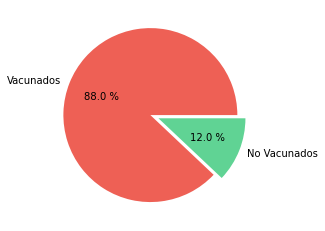

In [23]:
import matplotlib.pyplot as plt

gen = [PERSONAS,PERSONAS-len(DICCIONARIO_TIEMPO_DE_ESPERA)]
colores = ["#EE6055","#60D394"]
nombres = ["Vacunados","No Vacunados"]
desfase = (0, 0.1)
plt.pie(gen, labels=nombres, autopct="%0.1f %%", colors=colores,explode=desfase)
plt.show()

In [24]:
import pandas as pd
df = pd.DataFrame([[key, DICCIONARIO_TIEMPO_DE_ESPERA[key]] for key in DICCIONARIO_TIEMPO_DE_ESPERA.keys()], columns=['persona', 'tiempo'])
import plotly.express as px
fig = px.bar(df, x='persona', y="tiempo",title="Grafico De Las Personas Vacunadas En Funcion del tiempo")
fig.show()


# Segunda Dosis 

In [25]:
PERSONAS_SEGUNDA_DOSIS=0
CANTIDAD_MESA_SEGUNDA_DOSIS = 15
ESPERA_OBLIGATORIA_SEGUNDA_DOSIS = 20
TIEMPO_VACUNACION_SEGUNDA_DOSIS = 0
TIEMPO_LABORAL_SEGUNDA_DOSIS = 480 


DICCIONARIO_PERSONA_TIEMPO_VACUNACION = {}
DICCIONARIO_TIEMPO_DE_ESPERA = {}
DICCIONARIO_PERSONAS_NO_VACUNADAS = {}

In [26]:
#Ejecucion de Simulacion para el siguiente mes 
def ejecutar_simulacion_mes_siguiente(env,esperaobligatoria, controlmesa,tiempoVacunacion):
    gene_vacunacion=Principal(env,esperaobligatoria, controlmesa,tiempoVacunacion)
    global PERSONAS_SEGUNDA_DOSIS 
    
    #Creamos fila de  15 persona que llegan y esperan afuera hasta que abran las puertas.
    for i in range(15):
        env.process(recinto_borja(env, 'Persona %d'%(i+1), gene_vacunacion))
        PERSONAS_SEGUNDA_DOSIS =PERSONAS_SEGUNDA_DOSIS+1
    
    
    # Ejecutamos la simulacion
    while True:
        #Intervalo Llegada
        yield env.timeout(random.randint(1,5))
        i+=1
        PERSONAS_SEGUNDA_DOSIS=PERSONAS_SEGUNDA_DOSIS+1
        #print("Total:",PERSONAS)
        env.process(recinto_borja(env,'Persona %d'%(i+1), gene_vacunacion))  
    

print('Simulacion Vacunacion Ecuador mes Siguiente')

# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env,ESPERA_OBLIGATORIA_SEGUNDA_DOSIS,CANTIDAD_MESA_SEGUNDA_DOSIS,TIEMPO_VACUNACION_SEGUNDA_DOSIS))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_LABORAL_SEGUNDA_DOSIS)

Simulacion Vacunacion Ecuador mes Siguiente
Inicio de [Persona 1] llega al recinto Borja  0.00.
Inicio de [Persona 2] llega al recinto Borja  0.00.
Inicio de [Persona 3] llega al recinto Borja  0.00.
Inicio de [Persona 4] llega al recinto Borja  0.00.
Inicio de [Persona 5] llega al recinto Borja  0.00.
Inicio de [Persona 6] llega al recinto Borja  0.00.
Inicio de [Persona 7] llega al recinto Borja  0.00.
Inicio de [Persona 8] llega al recinto Borja  0.00.
La [Persona 8] no puede vacunarse
Inicio de [Persona 9] llega al recinto Borja  0.00.
La [Persona 9] no puede vacunarse
Inicio de [Persona 10] llega al recinto Borja  0.00.
Inicio de [Persona 11] llega al recinto Borja  0.00.
Inicio de [Persona 12] llega al recinto Borja  0.00.
Inicio de [Persona 13] llega al recinto Borja  0.00.
Inicio de [Persona 14] llega al recinto Borja  0.00.
Inicio de [Persona 15] llega al recinto Borja  0.00.
Inicio de [Persona 16] llega al recinto Borja  0.00.
Inicio de [Persona 17] llega al recinto Borja  0.

Tiempo Total De Persona 140 = 32
Inicio de [Persona 149] llega al recinto Borja  399.00.
La [Persona 149] pasa a la mesa de vacunacion : 399.00.
Inicio de [Persona 150] llega al recinto Borja  400.00.
Salida de la [Persona 142] sale del recinto a las 400.00.
Tiempo Total De Persona 142 = 28
La [Persona 150] pasa a la mesa de vacunacion : 400.00.
La [Persona 147] fue vacunada a las 401.00.
La [Persona 148] fue vacunada a las 402.00.
Inicio de [Persona 151] llega al recinto Borja  404.00.
La [Persona 151] pasa a la mesa de vacunacion : 404.00.
La [Persona 143] pasa a recibir su certificado a las 405.00.
La [Persona 149] fue vacunada a las 405.00.
La [Persona 150] fue vacunada a las 405.00.
Inicio de [Persona 152] llega al recinto Borja  406.00.
La [Persona 152] pasa a la mesa de vacunacion : 406.00.
Salida de la [Persona 143] sale del recinto a las 408.00.
Tiempo Total De Persona 143 = 33
Inicio de [Persona 153] llega al recinto Borja  410.00.
La [Persona 153] pasa a la mesa de vacunacio

In [27]:
import pandas as pd
df = pd.DataFrame([[key, DICCIONARIO_TIEMPO_DE_ESPERA[key]] for key in DICCIONARIO_TIEMPO_DE_ESPERA.keys()], columns=['persona', 'tiempo'])
import plotly.express as px
fig = px.bar(df, x='persona', y="tiempo",title="Grafico De Las Personas Vacunadas En Funcion del tiempo")
fig.show()


In [28]:
print("************************** Vacunacion Recinto Borja ******************************")
print("Tiempo Laboral del recinto:",TIEMPO_LABORAL/60," horas")
print("Cantida De Mesas en el recinto: ",CANTIDAD_MESA_SEGUNDA_DOSIS)
print("De una total de",PERSONAS_SEGUNDA_DOSIS)
print("Se Vacunaron un total de:",len(DICCIONARIO_TIEMPO_DE_ESPERA))
print("No se Vacunaron un total de:",PERSONAS-len(DICCIONARIO_TIEMPO_DE_ESPERA))
print("Tiempo promedio de vacunados :",round(TIEMPO_LABORAL/len(DICCIONARIO_TIEMPO_DE_ESPERA),2))

************************** Vacunacion Recinto Borja ******************************
Tiempo Laboral del recinto: 8.0  horas
Cantida De Mesas en el recinto:  15
De una total de 0
Se Vacunaron un total de: 150
No se Vacunaron un total de: 215
Tiempo promedio de vacunados : 3.2
